# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [27]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_data_df = pd.merge(study_results,mouse_metadata, on = "Mouse ID", how="left")

# Display the data table for preview
combined_data_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
num_mice = combined_data_df['Mouse ID'].nunique()
print(num_mice)

249


In [3]:
# Data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice_ID = combined_data_df.loc[combined_data_df.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
duplicate_mice_ID

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mice_data = combined_data_df.loc[combined_data_df['Mouse ID'] == "g989", :]

duplicate_mice_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_data_df = combined_data_df[combined_data_df['Mouse ID'].isin(duplicate_mice_ID)==False]
cleaned_data_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
# Checking the number of mice in the clean DataFrame.
new_mice = cleaned_data_df["Mouse ID"].nunique()
print(new_mice)

248


## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
grouped_df = cleaned_data_df.groupby("Drug Regimen")["Tumor Volume (mm3)"]
mean_tumor_volume = grouped_df.mean()
median_tumor_volume = grouped_df.median()
var_tumor_volume = grouped_df.var(ddof=0)
sd_tumor_volume = grouped_df.std(ddof=0)
sem_tumor_volume = grouped_df.sem()

summary_df = pd.DataFrame({
    "Mean Tumor Volume": mean_tumor_volume,
    "Median Tumor Volume": median_tumor_volume,
    "Tumor Volume Variance": var_tumor_volume,
    "Tumor Volume Std. Dev": sd_tumor_volume,
    "Tumor Volume Std. Err": sem_tumor_volume
})

summary_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev,Tumor Volume Std. Err
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.839296,4.983904,0.329346
Ceftamin,52.591172,51.776157,39.069446,6.250556,0.469821
Infubinol,52.884795,51.820584,42.886388,6.548770,0.492236
Ketapril,55.235638,53.698743,68.188930,8.257659,0.603860
Naftisol,54.331565,52.509285,65.817708,8.112811,0.596466
Placebo,54.033581,52.288934,60.830138,7.799368,0.581331
Propriva,52.320930,50.446266,43.555716,6.599675,0.544332
Ramicane,40.216745,40.673236,23.383692,4.835669,0.320955
Stelasyn,54.233149,52.431737,59.122106,7.689090,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_agg_df = cleaned_data_df.groupby(["Drug Regimen"])[["Tumor Volume (mm3)"]].agg(['mean', 'median', 'var', 'std', 'sem'])
summary_agg_df

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

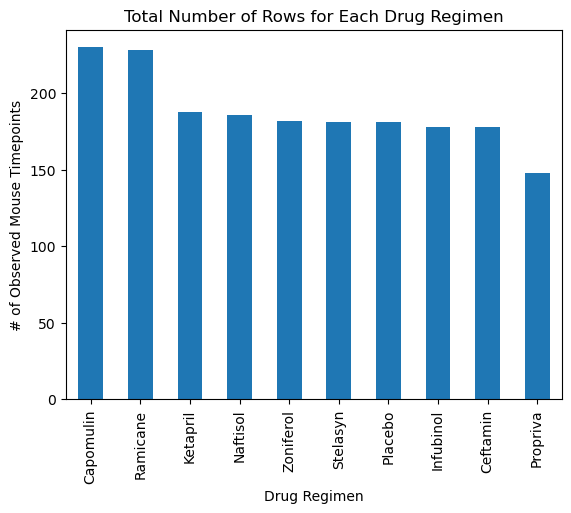

<Figure size 640x480 with 0 Axes>

In [8]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
# Group the DataFrame by "Drug Regimen" and count the rows
drug_regimen = cleaned_data_df["Drug Regimen"].value_counts()

#Create bar plot
bar_plot_pandas = drug_regimen.plot(kind ="bar", y="Timepoint", legend=False)

#Set the labels and title
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.title("Total Number of Rows for Each Drug Regimen")

plt.show()
plt.tight_layout()

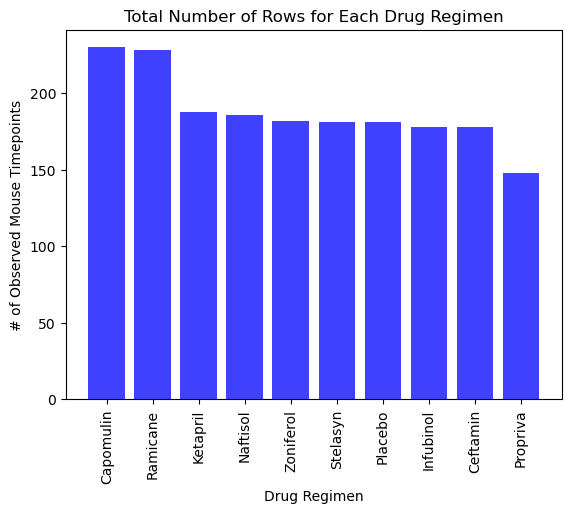

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
# Compute the count of rows for each drug regimen
drug_regimen_counts = cleaned_data_df["Drug Regimen"].value_counts()

# Extract the drug regimens and their counts
x_axis = drug_regimen_counts.index
y_axis = drug_regimen_counts.values
plt.bar(x_axis, y_axis, color='b', alpha = 0.75, align = "center")

# Set the labels
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.title("Total Number of Rows for Each Drug Regimen")

# Rotate the x-axis labels for better readability
plt.xticks(rotation = "vertical")
plt.show()

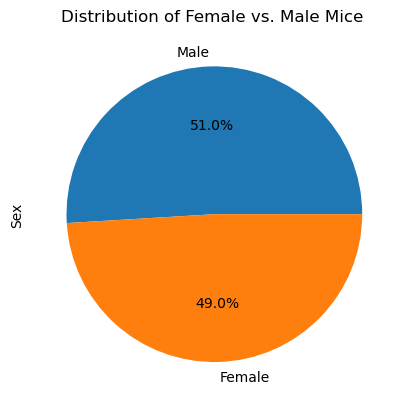

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

gender_counts = cleaned_data_df["Sex"].value_counts()
#Create pie plot using Pandas
pie_plot_pandas = gender_counts.plot(kind="pie", autopct="%1.1f%%", shadow = False, startangle= 360)

#set plot title
plt.title('Distribution of Female vs. Male Mice ')

plt.show()

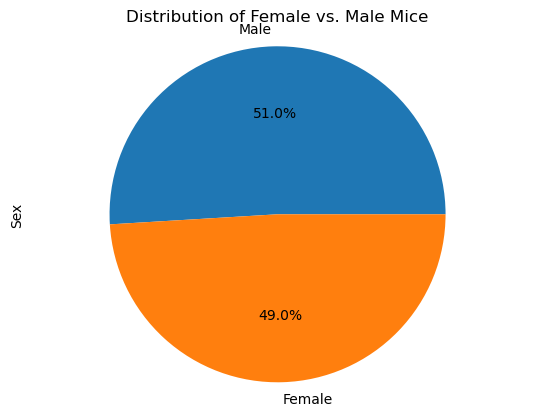

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# Compute the count of female and male mice
gender_counts = cleaned_data_df["Sex"].value_counts()

# Create labels & values for the pie plot
labels = gender_counts.index
sizes = gender_counts.values

# Create the pie plot
plt.pie(sizes, labels=labels, autopct="%1.1f%%", shadow=False, startangle=360)

# Set aspect ratio to be equal so that pie is drawn as a circle
plt.axis("equal")

#Set y-label
plt.ylabel("Sex")

# Set the title of the pie plot
plt.title('Distribution of Female vs. Male Mice')

# Display the pie plot
plt.show()

## Quartiles, Outliers and Boxplots

In [21]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
Capomulin_df = cleaned_data_df.loc[cleaned_data_df["Drug Regimen"] == "Capomulin", :]
Ramicane_df = cleaned_data_df.loc[cleaned_data_df["Drug Regimen"] == "Ramicane", :]
Infubinol_df = cleaned_data_df.loc[cleaned_data_df["Drug Regimen"] == "Infubinol", :]
Ceftamin_df = cleaned_data_df.loc[cleaned_data_df["Drug Regimen"] == "Ceftamin", :]

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = cleaned_data_df.groupby("Mouse ID")["Timepoint"].max()
last_timepoint_df = pd.DataFrame(last_timepoint)

# Merge this group df with the original cleaned DataFrame to get the tumor volume at the last timepoint
merged_df = pd.merge(last_timepoint_df, cleaned_data_df, on=["Mouse ID", "Timepoint"], how="left")
merged_df.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29


In [22]:
# Put treatments into a list for the for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Loop through each treatment
for treatment in treatments:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_vol = merged_df.loc[merged_df["Drug Regimen"] == treatment, "Tumor Volume (mm3)"]
    
    # add subset
    tumor_vol_data.append(tumor_vol)
    
    # Determine if there are any potential outliers
    if tumor_vol.empty:
        outliers = "Series([], Name: Tumor Volume (mm3), dtype: float64)"
    else:
        # Calculate the IQR and quantitatively determine if there are any potential outliers
        quartiles = tumor_vol.quantile([0.25, 0.5, 0.75])
        lowerq = quartiles[0.25]
        upperq = quartiles[0.75]
        iqr = upperq - lowerq
        lower_bound = lowerq - (1.5 * iqr)
        upper_bound = upperq + (1.5 * iqr)
        
       # Determine outliers using upper and lower bounds
        outliers = tumor_vol.loc[(tumor_vol < lower_bound) | (tumor_vol > upper_bound)]
    
    # Print the treatment name and potential outliers (if any)
    print(f"{treatment}'s potential outliers: {outliers}")


Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


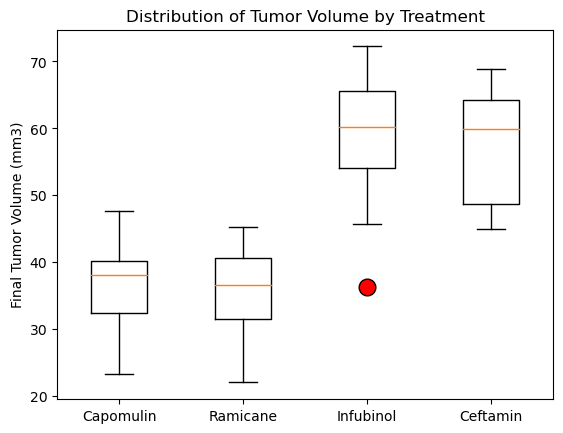

In [23]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

#Plot labels
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create a list of tumor volume data for each treatment group
tumor_vol_data = [merged_df.loc[merged_df["Drug Regimen"] == treatment, "Tumor Volume (mm3)"] for treatment in treatments]

# Create figure and axes
fig, ax = plt.subplots()

# Create the box plot
ax.boxplot(tumor_vol_data, flierprops=dict(marker="o", markerfacecolor="red", markeredgecolor="black", markersize=12))


# Set x-axis tick labels
ax.set_xticklabels(treatments)

# Set y-axis label
ax.set_ylabel("Final Tumor Volume (mm3)")

# Set plot title
ax.set_title("Distribution of Tumor Volume by Treatment")


# Show the plot
plt.show()


## Line and Scatter Plots

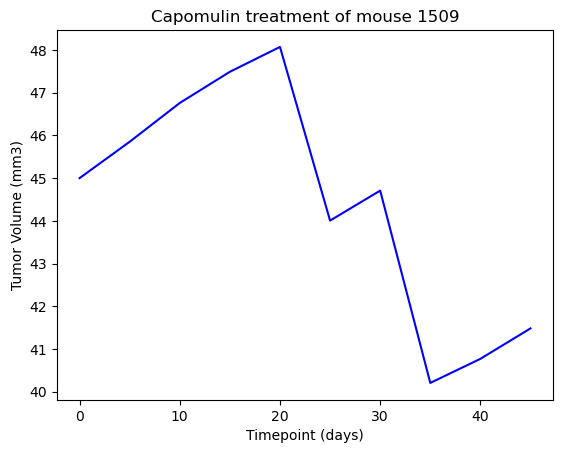

In [24]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

line_df = Capomulin_df.loc[Capomulin_df["Mouse ID"] == "l509",:]

x_axis = line_df["Timepoint"]
tumor_volume = line_df["Tumor Volume (mm3)"]

# Create figure and axes
fig, ax = plt.subplots()

# Create a line plot
plt.plot(x_axis, tumor_volume, linewidth=1.5,color="blue", label="Fahreneit")

#Set labels and title
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin treatment of mouse 1509")
plt.show()


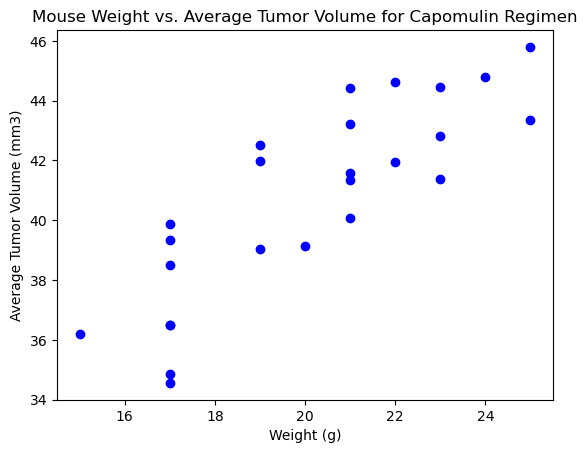

In [25]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

# Get the average tumor volume for each mouse
avg_tumor_volume = Capomulin_df.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()

# Get the corresponding mouse weights
mouse_weights = Capomulin_df.groupby("Mouse ID")["Weight (g)"].mean()

# Create a scatter plot
plt.scatter(mouse_weights, avg_tumor_volume, color="blue")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Mouse Weight vs. Average Tumor Volume for Capomulin Regimen")
plt.show()


## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


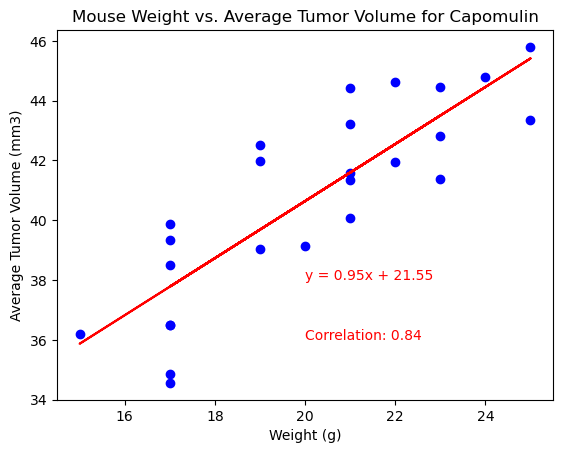

In [28]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

# Calculate the correlation coefficient
correlation_coefficient = round(st.pearsonr(mouse_weights, avg_tumor_volume)[0], 2)
print(f"The correlation between mouse weight and the average tumor volume is {correlation_coefficient}")


# Perform linear regression
slope, intercept, r_value, p_value, std_err = stats.linregress(mouse_weights, avg_tumor_volume)

# Create scatter plot
plt.scatter(mouse_weights, avg_tumor_volume, color="blue")

# Add linear regression line
regression_line = slope * mouse_weights + intercept
plt.plot(mouse_weights, regression_line, color="red")


# Add labels and title
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Mouse Weight vs. Average Tumor Volume for Capomulin")

# Add correlation coefficient and linear regression equation to the plot
equation = f"y = {slope:.2f}x + {intercept:.2f}"
correlation = f"Correlation: {correlation_coefficient:.2f}"

# Add text annotations to the plot
plt.text(20, 38, equation, color="red")
plt.text(20, 36, correlation, color="red")

# Display the plot
plt.show()